In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')

In [12]:
env_config = {
    "col" : "dns.col",
    "N_batch": 5,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [np.array([1,1,1]),np.array([1,1,1]),np.array([1,1,1])],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1].astype(int),np.zeros(10).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:20, 1:4][1].astype(int),np.zeros(20).reshape(-1,1).astype(int))),
                    np.hstack((np.mgrid[0:40, 1:4][1].astype(int),np.zeros(40).reshape(-1,1).astype(int)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(10).astype(int),np.zeros(20).astype(int),np.zeros(40).astype(int)], #All data is initialized to the first step of it's rplan
    "init_expir": [5,10,50], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
           pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])]
}

## Individual Stepper

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

0 rows expired in 3     Age  Key Terrain  Queries
0   2.0         0.25     0.25
1   5.0         1.00     1.00
2   4.0         0.25     0.25
3   3.0         0.25     0.25
4   2.0         0.25     0.25
5   2.0         0.25     0.25
6   NaN          NaN      NaN
7   NaN          NaN      NaN
8   NaN          NaN      NaN
9   NaN          NaN      NaN
10  NaN          NaN      NaN
11  NaN          NaN      NaN
12  NaN          NaN      NaN
13  NaN          NaN      NaN
14  NaN          NaN      NaN
15  NaN          NaN      NaN
16  NaN          NaN      NaN
17  NaN          NaN      NaN
18  NaN          NaN      NaN
19  NaN          NaN      NaN
20  NaN          NaN      NaN
21  NaN          NaN      NaN
22  NaN          NaN      NaN
23  NaN          NaN      NaN
24  NaN          NaN      NaN
25  NaN          NaN      NaN
26  NaN          NaN      NaN
27  NaN          NaN      NaN
28  NaN          NaN      NaN
29  NaN          NaN      NaN
30  NaN          NaN      NaN
31  NaN          NaN

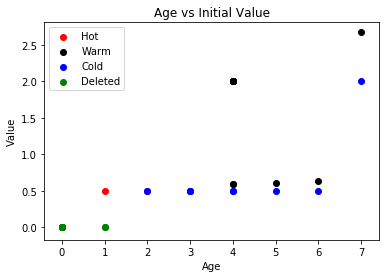

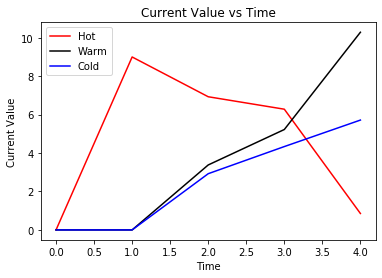

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [nan, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [7]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.ones((5,3))*0.25,columns=['Age','Key Terrain','Queries'])#np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
vals['Age'] = 0
val_tot = np.zeros(5)
rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load_static(env, db, 100)
t += 1
env.render(out=0)
clr = ['r','k','b']
sub = plt.subplot()
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
for i in np.arange(env.num_ds):
    vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
    sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

sub.legend(loc=2)
plt.show()

#env.render(out=1)
print(env.del_val)

## RL agent run

0 rows expired in 1    Age Key Terrain Queries
0  NaN         NaN     NaN
1  NaN         NaN     NaN
2  NaN         NaN     NaN
3  NaN         NaN     NaN
4  NaN         NaN     NaN
5  NaN         NaN     NaN
6  NaN         NaN     NaN
7  NaN         NaN     NaN
8  NaN         NaN     NaN
9  NaN         NaN     NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN

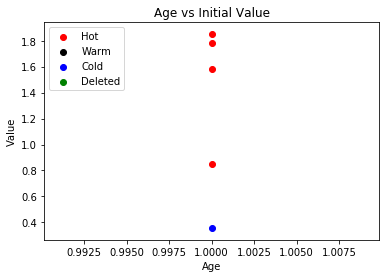

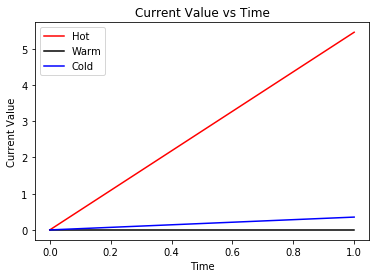

[]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.423655  0.645894
1  1.0     0.891773  0.963663
2  1.0     0.791725  0.528895
3  1.0     0.925597  0.071036
4  NaN          NaN       NaN
5  NaN          NaN       NaN
6  NaN          NaN       NaN
7  NaN          NaN       NaN
8  NaN          NaN       NaN
9  NaN          NaN       NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired in 3     Age  Key Terrai

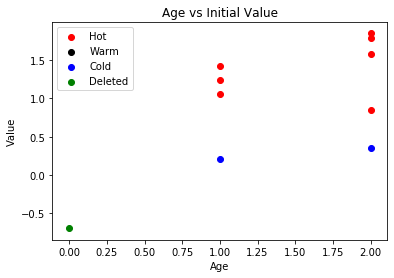

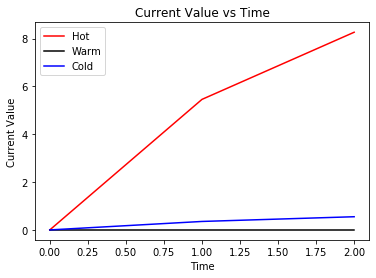

[[0.0, 0.6928434773474355]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.423655  0.645894
1  2.0     0.891773  0.963663
2  2.0     0.791725  0.528895
3  2.0     0.925597  0.071036
4  1.0     0.710337  0.007884
5  1.0     0.530537  0.922111
6  1.0     0.622231  0.279068
7  NaN          NaN       NaN
8  NaN          NaN       NaN
9  NaN          NaN       NaN
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
0 rows expired

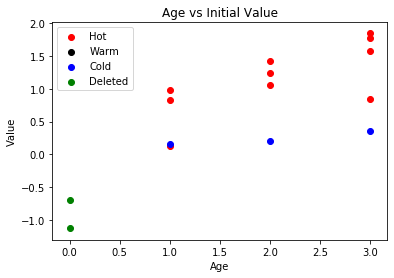

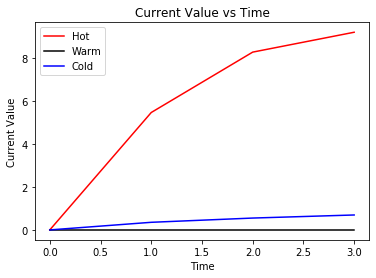

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018]]
0 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.423655  0.645894
1  3.0     0.891773  0.963663
2  3.0     0.791725  0.528895
3  3.0     0.925597  0.071036
4  2.0     0.710337  0.007884
5  2.0     0.530537  0.922111
6  2.0     0.622231  0.279068
7  1.0     0.492632  0.345138
8  1.0     0.066207  0.013865
9  1.0     0.413758  0.677045
0 rows expired in 2     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN        

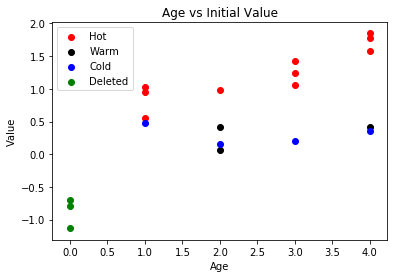

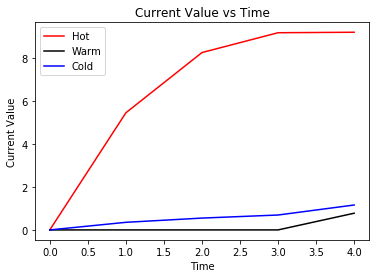

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.515595  0.366147
1  4.0     0.891773  0.963663
2  4.0     0.791725  0.528895
3  4.0     0.925597  0.071036
4  3.0     0.710337  0.007884
5  3.0     0.530537  0.922111
6  3.0     0.622231  0.279068
7  2.0     0.492632  0.345138
8  1.0     0.474885  0.435883
9  1.0     0.273383  0.546963
0 rows expired in 2     Age  Key Terrain   Queries
0   2.0     0.066207  0.013865
1   4.0     0.423655  0.645894
2   2.0     0.413758  0.677045
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN 

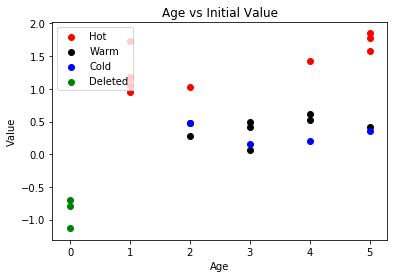

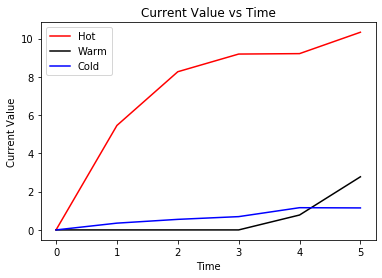

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
3 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.515595  0.366147
1  5.0     0.891773  0.963663
2  5.0     0.791725  0.528895
3  5.0     0.925597  0.071036
4  4.0     0.710337  0.007884
5  1.0     0.865677  0.585445
6  1.0     0.581269  0.856185
7  1.0     0.588542  0.221319
8  1.0     0.477352  0.356343
9  1.0     0.532721  0.809212
0 rows expired in 2     Age  Key Terrain   Queries
0   3.0     0.066207  0.013865
1   5.0     0.423655  0.645894
2   3.0     0.413758  0.677045
3   2.0     0.273383  0.546963
4   4.0     0.530537  0.922111
5   3.0     0.492632  0.345138
6   2.0     0.474885  0.435883
7   4.0     0.622231  0.279068
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN 

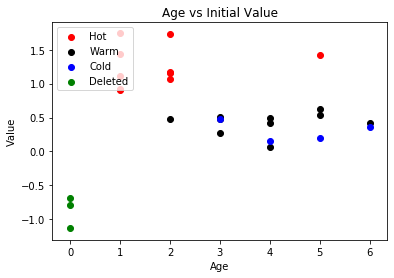

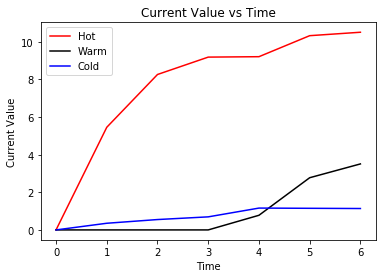

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.455436  0.092685
1  1.0     0.716024  0.862166
2  1.0     0.461094  0.965116
3  1.0     0.558731  0.330617
4  5.0     0.710337  0.007884
5  2.0     0.865677  0.585445
6  2.0     0.581269  0.856185
7  2.0     0.588542  0.221319
8  1.0     0.871968  0.448282
9  2.0     0.532721  0.809212
0 rows expired in 2     Age  Key Terrain   Queries
0   4.0     0.066207  0.013865
1   6.0     0.423655  0.645894
2   4.0     0.413758  0.677045
3   3.0     0.273383  0.546963
4   5.0     0.530537  0.922111
5   4.0     0.492632  0.345138
6   3.0     0.474885  0.435883
7   5.0     0.622231  0.279068
8   3.0     0.515595  0.366147
9   2.0     0.477352  0.356343
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN 

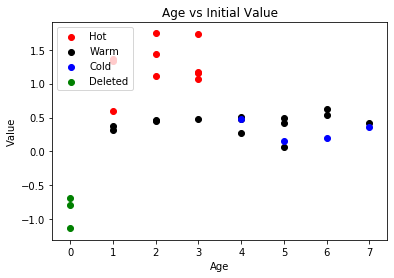

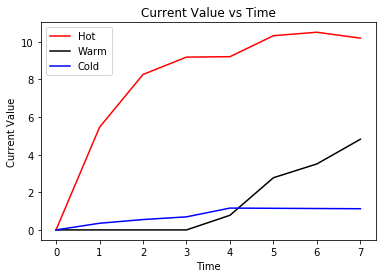

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.668155  0.287798
1  2.0     0.716024  0.862166
2  1.0     0.300733  0.886993
3  2.0     0.558731  0.330617
4  1.0     0.684938  0.566024
5  3.0     0.865677  0.585445
6  3.0     0.581269  0.856185
7  3.0     0.588542  0.221319
8  2.0     0.871968  0.448282
9  3.0     0.532721  0.809212
0 rows expired in 2     Age  Key Terrain   Queries
0   5.0     0.066207  0.013865
1   7.0     0.423655  0.645894
2   5.0     0.413758  0.677045
3   4.0     0.273383  0.546963
4   6.0     0.530537  0.922111
5   5.0     0.492632  0.345138
6   4.0     0.474885  0.435883
7   6.0     0.622231  0.279068
8   4.0     0.515595  0.366147
9   3.0     0.477352  0.356343
10  2.0     0.455436  0.092685
11  1.0     0.380315  0.862198
12  1.0     0.315905  0.773678
13  2.0     0.461094  0.965116
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN 

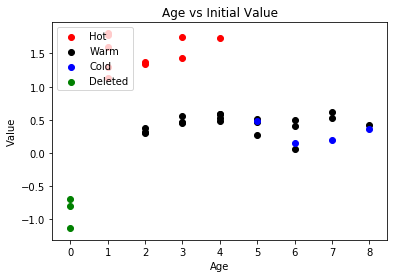

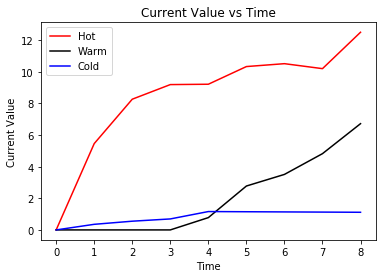

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.668155  0.287798
1  3.0     0.716024  0.862166
2  1.0     0.890605  0.841562
3  1.0     0.902802  0.797903
4  2.0     0.684938  0.566024
5  4.0     0.865677  0.585445
6  1.0     0.568153  0.679797
7  1.0     0.649661  0.474868
8  3.0     0.871968  0.448282
9  1.0     0.798619  0.961170
0 rows expired in 2     Age  Key Terrain   Queries
0   6.0     0.066207  0.013865
1   8.0     0.423655  0.645894
2   6.0     0.413758  0.677045
3   5.0     0.273383  0.546963
4   7.0     0.530537  0.922111
5   6.0     0.492632  0.345138
6   5.0     0.474885  0.435883
7   7.0     0.622231  0.279068
8   5.0     0.515595  0.366147
9   4.0     0.477352  0.356343
10  3.0     0.455436  0.092685
11  2.0     0.380315  0.862198
12  2.0     0.315905  0.773678
13  3.0     0.461094  0.965116
14  2.0     0.300733  0.886993
15  4.0     0.532721  0.809212
16  4.0     0.581269 

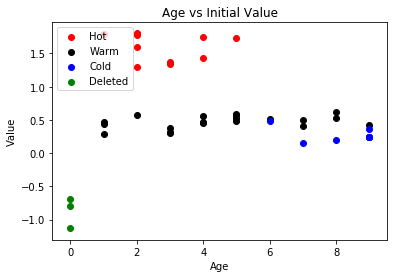

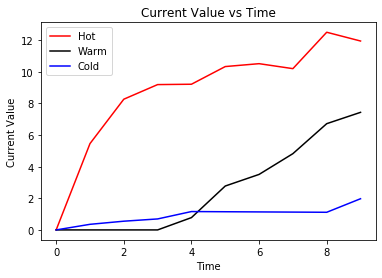

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.668155  0.287798
1  4.0     0.716024  0.862166
2  2.0     0.890605  0.841562
3  2.0     0.902802  0.797903
4  3.0     0.684938  0.566024
5  5.0     0.865677  0.585445
6  1.0     0.897509  0.440355
7  2.0     0.649661  0.474868
8  4.0     0.871968  0.448282
9  2.0     0.798619  0.961170
0 rows expired in 2     Age  Key Terrain   Queries
0   1.0     0.462593  0.817623
1   9.0     0.423655  0.645894
2   7.0     0.413758  0.677045
3   1.0     0.289682  0.735397
4   8.0     0.530537  0.922111
5   7.0     0.492632  0.345138
6   1.0     0.443153  0.668914
7   8.0     0.622231  0.279068
8   6.0     0.515595  0.366147
9   5.0     0.477352  0.356343
10  4.0     0.455436  0.092685
11  3.0     0.380315  0.862198
12  3.0     0.315905  0.773678
13  4.0     0.461094  0.965116
14  3.0     0.300733  0.886993
15  5.0     0.532721  0.809212
16  5.0     0.581269 

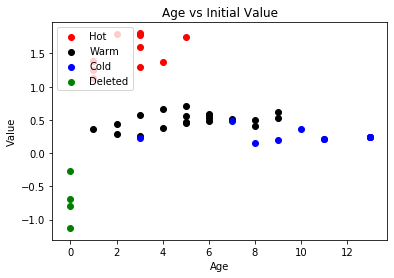

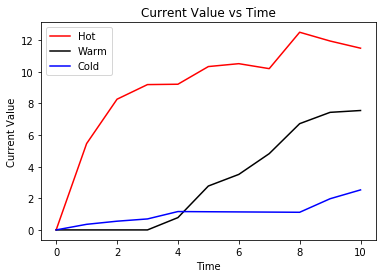

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.566826  0.946161
1  1.0     0.622192  0.893406
2  3.0     0.890605  0.841562
3  3.0     0.902802  0.797903
4  4.0     0.684938  0.566024
5  1.0     0.690874  0.753525
6  2.0     0.897509  0.440355
7  3.0     0.649661  0.474868
8  5.0     0.871968  0.448282
9  3.0     0.798619  0.961170
0 rows expired in 2     Age  Key Terrain   Queries
0   3.0     0.462593  0.817623
1   1.0     0.356535  0.770376
2   8.0     0.413758  0.677045
3   2.0     0.289682  0.735397
4   9.0     0.530537  0.922111
5   8.0     0.492632  0.345138
6   2.0     0.443153  0.668914
7   9.0     0.622231  0.279068
8   7.0     0.515595  0.366147
9   6.0     0.477352  0.356343
10  5.0     0.455436  0.092685
11  4.0     0.380315  0.862198
12  4.0     0.668155  0.287798
13  5.0     0.461094  0.965116
14  5.0     0.716024  0.862166
15  6.0     0.532721  0.8

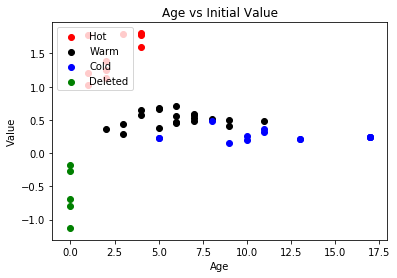

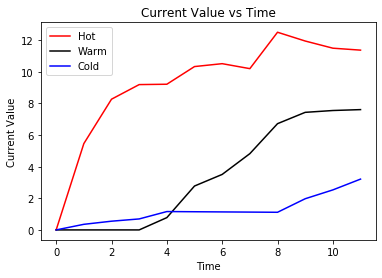

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.566826  0.946161
1  2.0     0.622192  0.893406
2  4.0     0.890605  0.841562
3  4.0     0.902802  0.797903
4  1.0     0.604011  0.737298
5  2.0     0.690874  0.753525
6  3.0     0.897509  0.440355
7  1.0     0.514552  0.350307
8  1.0     0.889148  0.677848
9  4.0     0.798619  0.961170
1 rows expired in 2      Age  Key Terrain   Queries
0    5.0     0.684938  0.566024
1    2.0     0.356535  0.770376
2    9.0     0.413758  0.677045
3    3.0     0.289682  0.735397
4    4.0     0.649661  0.474868
5    9.0     0.492632  0.345138
6    3.0     0.443153  0.668914
7   11.0     0.622231  0.279068
8    8.0     0.515595  0.366147
9    7.0     0.477352  0.356343
10   6.0     0.455436  0.092685
11   5.0     0.380315  0.862198
12   5.0     0.668155  0.287798
13   6.0     0.461094  0.965116
14   6.0     

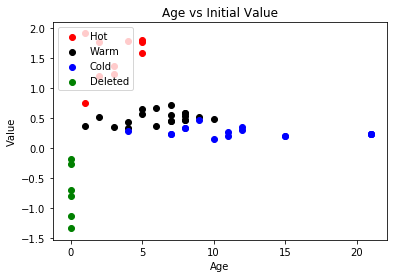

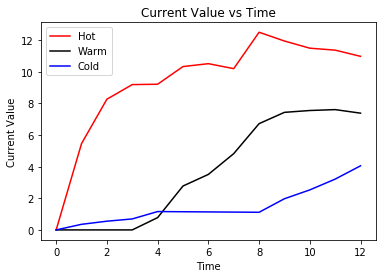

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158]]
3 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.961796  0.447414
1  3.0     0.622192  0.893406
2  5.0     0.890605  0.841562
3  5.0     0.902802  0.797903
4  2.0     0.604011  0.737298
5  3.0     0.690874  0.753525
6  4.0     0.897509  0.440355
7  1.0     0.374148  0.569794
8  2.0     0.889148  0.677848
9  5.0     0.798619  0.961170
1 rows expired in 2      Age  Key Terrain   Queries
0    8.0     0.684938  0.566024
1    3.0     0.356535  0.770376
2    1.0     0.373346  0.238988
3    2.0     0.514552  0.350307
4    5.0     0.649661  0.474868
5   10.0     0.492632  0.345138
6    4.0     0.443153  0.668914
7    4.0     0.566826  0.946161
8    9.0     0.515595  0.366147
9    8.0     0.477352  0.356343
10   7.0     0.455436  0.092685
11   6.0     0.380315  0.862198
12   6.0     0.668155  0.287798
13   7.0     0.461

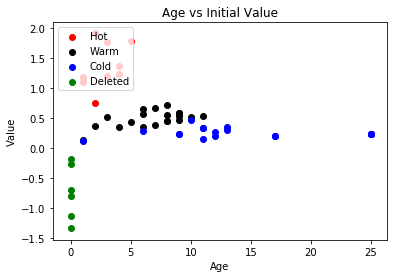

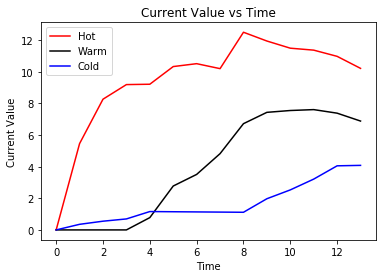

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.961796  0.447414
1  4.0     0.622192  0.893406
2  1.0     0.590966  0.224524
3  1.0     0.574923  0.138094
4  3.0     0.604011  0.737298
5  4.0     0.690874  0.753525
6  5.0     0.897509  0.440355
7  2.0     0.374148  0.569794
8  3.0     0.889148  0.677848
9  1.0     0.552212  0.401260
2 rows expired in 2      Age  Key Terrain   Queries
0   11.0     0.684938  0.566024
1    4.0     0.356535  0.770376
2    2.0     0.373346  0.238988
3    3.0     0.514552  0.350307
4    6.0     0.649661  0.474868
5    1.0     0.142769  0.894928
6    5.0     0.443153  0.668914
7    6.0     0.566826  0.946161
8   10.0     0.515595  0.366147
9    9.0     0.477352  0.356343
10   8.0     0.455436  0.092685
11   7.0     0.380315  0.862198
12   7.0     0.668155  0.287798
13   8.0     0.461

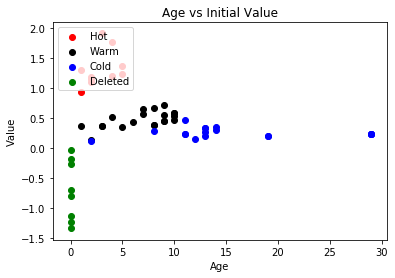

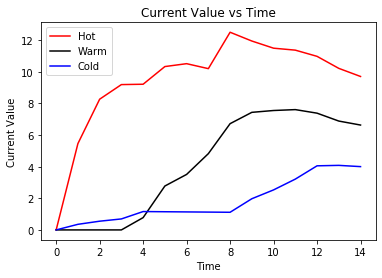

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404]]
2 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.961796  0.447414
1  5.0     0.622192  0.893406
2  2.0     0.590966  0.224524
3  2.0     0.574923  0.138094
4  4.0     0.604011  0.737298
5  5.0     0.690874  0.753525
6  1.0     0.466016  0.990567
7  1.0     0.649722  0.644678
8  4.0     0.889148  0.677848
9  2.0     0.552212  0.401260
4 rows expired in 2      Age  Key Terrain   Queries
0    3.0     0.374148  0.569794
1    5.0     0.356535  0.770376
2    3.0     0.373346  0.238988
3    4.0     0.514552  0.350307
4    7.0     0.649661  0.474868
5    2.0     0.142769  0.894928
6    6.0     0.443153  0.668914
7    8.0     0.566826  0.946161
8    1.0     0.366034  0.102277
9   10.0     0.477352  0.356343
10   9.0     0.455436  0.092685
11   8.0     0.380315  0.86

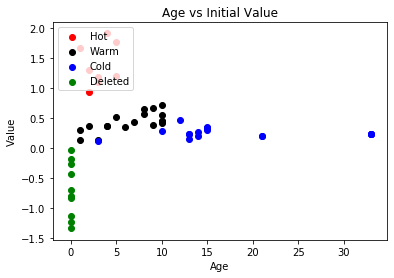

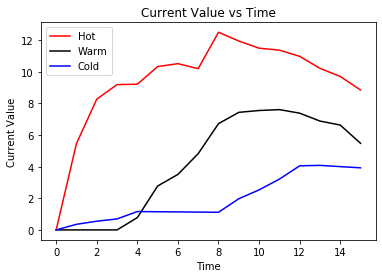

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308]]
2 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.961796  0.447414
1  1.0     0.839189  0.771484
2  3.0     0.590966  0.224524
3  3.0     0.574923  0.138094
4  5.0     0.604011  0.737298
5  NaN          NaN       NaN
6  2.0     0.466016  0.990567
7  2.0     0.649722  0.644678
8  5.0     0.889148  0.677848
9  3.0     0.552212  0.401260
5 rows expired in 2      Age  Key Terrain   Queries
0    4.0     0.374148  0.569794
1    6.0     0.356535  0.770376
2    4.0     0.373346  0.238988
3    5.0     0.514552  0.350307
4    8.0     0.649661  0.474868
5    3.0     0.142769  0.894928
6    7.0     0.443153  0.668914
7   10.0     0.566826  0.946161
8    2.0     0.366034  0.102277
9    1.0     0.130088  0.118176
10  1

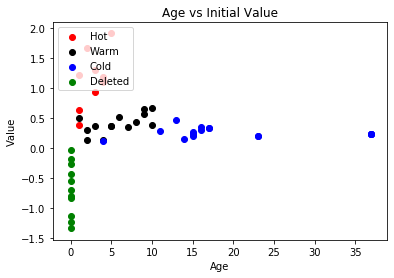

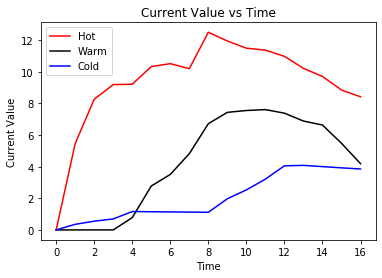

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977]]
1 rows expired in 1    Age  Key Terrain   Queries
0  5.0     0.961796  0.447414
1  2.0     0.839189  0.771484
2  4.0     0.590966  0.224524
3  4.0     0.574923  0.138094
4  1.0     0.196452  0.868000
5  1.0     0.322813  0.838804
6  3.0     0.466016  0.990567
7  3.0     0.649722  0.644678
8  1.0     0.615621  0.349570
9  4.0     0.552212  0.401260
2 rows expired in 2      Age  Key Terrain   Queries
0    5.0     0.374148  0.569794
1    7.0     0.356535  0.770376
2    5.0     0.373346  0.238988
3    6.0     0.514552  0.350307
4    9.0     0.649661  0.474868
5    4.0     0.142769  0.894928
6    8.0     0.443153  0.668914
7    1.0     0.499308  0.739775
8    3.0     0.366034  0.102277
9    2.0  

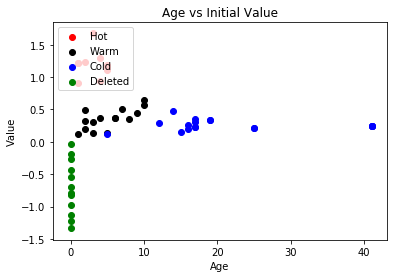

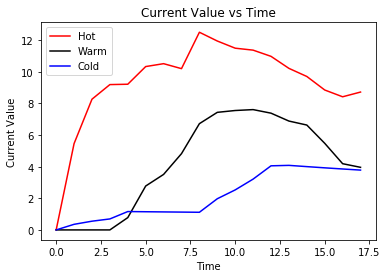

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651]]
3 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.452420  0.622061
1  3.0     0.839189  0.771484
2  5.0     0.590966  0.224524
3  5.0     0.574923  0.138094
4  1.0     0.606981  0.225266
5  1.0     0.609610  0.974617
6  4.0     0.466016  0.990567
7  4.0     0.649722  0.644678
8  2.0     0.615621  0.349570
9  5.0     0.552212  0.401260
2 rows expired in 2      Age  Key Terrain   Queries
0    6.0     0.374148  0.569794
1    8.0     0.356535  0.770376
2    6.0     0.373346  0.238988
3    7.0     0.514552  0.350307
4   10.0     0.649661  0.474868
5    5.0     0.142769  0.894928
6    9.0     0.443153  0.668914
7    2.0     0.499308  0.739775
8    4.0     0.

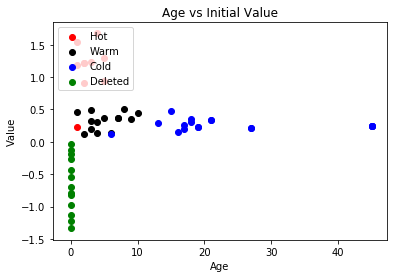

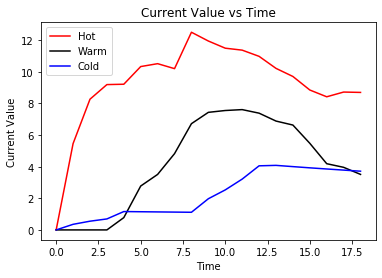

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325]]
2 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.452420  0.622061
1  4.0     0.839189  0.771484
2  1.0     0.117661  0.052765
3  1.0     0.773700  0.033239
4  2.0     0.606981  0.225266
5  2.0     0.609610  0.974617
6  5.0     0.466016  0.990567
7  5.0     0.649722  0.644678
8  3.0     0.615621  0.349570
9  1.0     0.594998  0.878072
1 rows expired in 2      Age  Key Terrain   Queries
0    7.0     0.374148  0.569794
1    9.0     0.356535  0.770376
2    7.0     0.373346  0.238988
3    8.0     0.514552  0.350307
4    1.0     0.466091  0.913955
5    6.0     0.142769  0.894928
6   10.0     0.443153  0.668914
7    3.0     0.4993

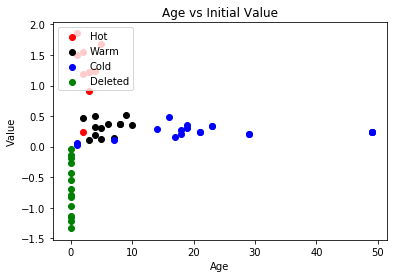

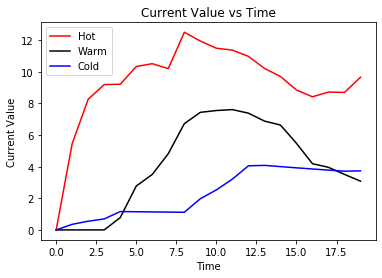

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.452420  0.622061
1  5.0     0.839189  0.771484
2  2.0     0.117661  0.052765
3  2.0     0.773700  0.033239
4  3.0     0.606981  0.225266
5  3.0     0.609610  0.974617
6  1.0     0.929451  0.154916
7  1.0     0.746511  0.949445
8  4.0     0.615621  0.349570
9  2.0     0.594998  0.878072
1 rows expired in 2      Age  Key Terrain   Queries
0    8.0     0.374148  0.569794
1   10.0     0.356535  0.770376
2    8.0     0.373346  0.238988
3    9.0     0.514552  0.350307
4    2.0     0.466091  0.913955
5    7.0     0.142769  0.894928
6    NaN          NaN   

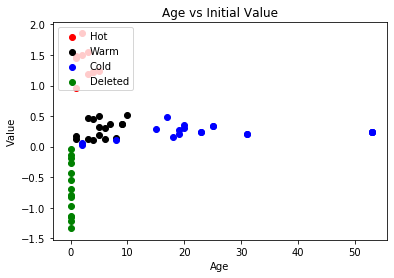

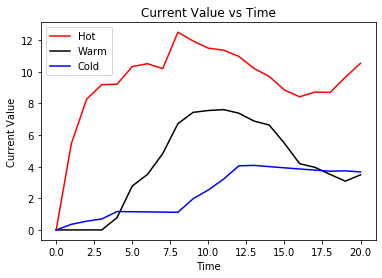

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.728600  0.799688
1  1.0     0.479878  0.099845
2  1.0     0.739160  0.546645
3  3.0     0.773700  0.033239
4  4.0     0.606981  0.225266
5  4.0     0.609610  0.974617
6  2.0     0.929451  0.154916
7  2.0     0.746511  0.949445
8  5.0     0.615621  0.349570
9  3.0     0.594998  0.878072
1 rows expired in 2      Age  Key Terrain   Queries
0    9.0     0.374148  0.569794
1    3.0     0.117661  0.052765
2    9.0     0.373346  0.238988
3   10.0     0.514552  0.350307
4    3.0     0.466091  0.913955
5    8.0     0.142769  0.894928
6    1.0     0.177122  0

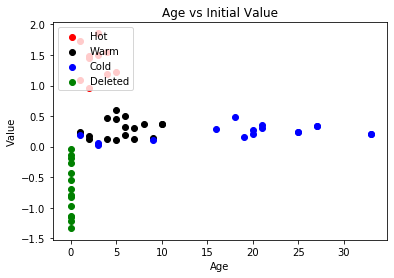

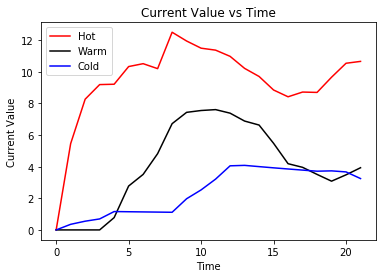

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.728600  0.799688
1  2.0     0.479878  0.099845
2  2.0     0.739160  0.546645
3  4.0     0.773700  0.033239
4  1.0     0.864674  0.532750
5  5.0     0.609610  0.974617
6  3.0     0.929451  0.154916
7  3.0     0.746511  0.949445
8  1.0     0.548111  0.717703
9  4.0     0.594998  0.878072
2 rows expired in 2      Age  Key Terrain   Queries
0   10.0     0.374148  0.569794
1    4.0     0.117661  0.052765
2   10.0     0.373346  0.238988
3    1.0     0.225840  0.093161
4    4.0     0.466091  0.913955
5    9.0     0.142769  0.894928
6    2.0     0.177122  0

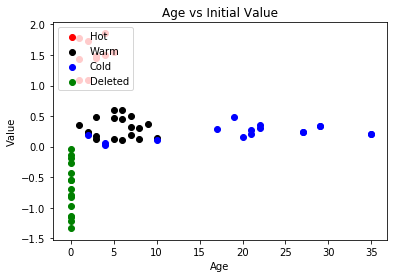

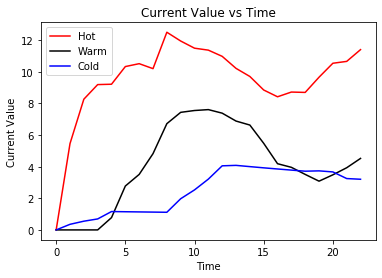

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.728600  0.799688
1  1.0     0.541852  0.665817
2  3.0     0.739160  0.546645
3  5.0     0.773700  0.033239
4  2.0     0.864674  0.532750
5  1.0     0.713777  0.716626
6  4.0     0.929451  0.154916
7  4.0     0.746511  0.949445
8  2.0     0.548111  0.717703
9  1.0     0.888672  0.326006
1 rows expired in 2      Age  Key Terrain   Queries
0    1.0     0.357699  0.602211
1    5.0     0.117661  0.052765
2    3.0     0.479878  0.099845
3    2.0     0.225840  0.093161
4    5.0     0.466091  0.913955
5   10.0     0.142769  0.8949

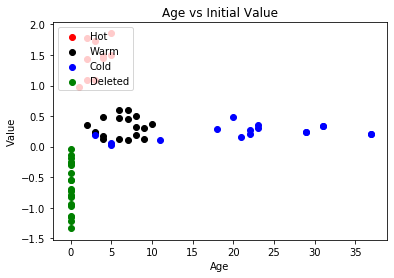

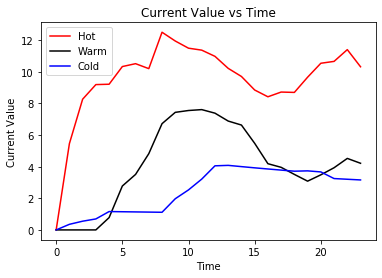

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095]]
2 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.728600  0.799688
1  2.0     0.541852  0.665817
2  4.0     0.739160  0.546645
3  1.0     0.487910  0.909898
4  3.0     0.864674  0.532750
5  2.0     0.713777  0.716626
6  5.0     0.929451  0.154916
7  5.0     0.746511  0.949445
8  3.0     0.548111  0.717703
9  2.0     0.888672  0.326006
1 rows expired in 2      Age  Key Terrain   Queries
0    2.0     0.357699  0.602211
1    6.0     0.117661  0.052765
2    4.0     0.4

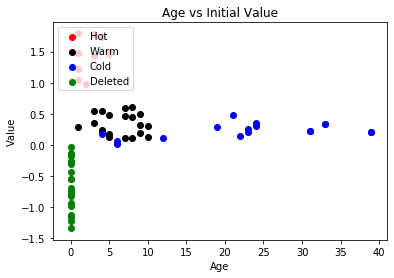

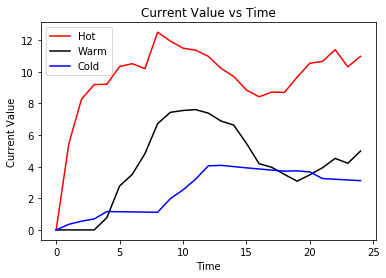

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095]]
2 rows expired in 1    Age  Key Terrain   Queries
0  5.0     0.728600  0.799688
1  1.0     0.611783  0.344045
2  5.0     0.739160  0.546645
3  2.0     0.487910  0.909898
4  4.0     0.864674  0.532750
5  3.0     0.713777  0.716626
6  1.0     0.898721  0.257204
7  1.0     0.735619  0.827862
8  1.0     0.520225  0.450569
9  3.0     0.888672  0.326006
2 rows expired in 2      Age  Key Terrain   Queries
0    3.0     0.357699  0.602211
1    7.0     0.117661  0.052765
2    5.0     0.4

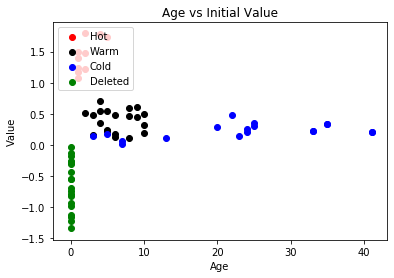

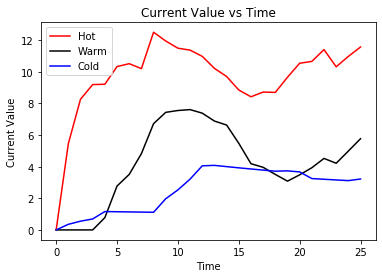

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.746322  0.108677
1  2.0     0.611783  0.344045
2  1.0     0.538498  0.584502
3  1.0     0.589663  0.692755
4  5.0     0.864674  0.532750
5  1.0     0.695116  0.779114
6  2.0     0.898721  0.257204
7  2.0     0.735619  0.827862
8  1.0     0.619657  0.467182
9  4.0     0.888672  0.326006
3 rows expired in 2      Age  Key Terrain   Queries
0    4.0     0.357699  0.602211
1    8.0     0.117661  0.052765
2    6.0     0.4

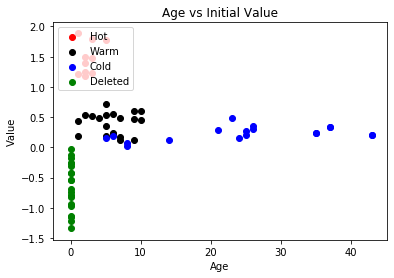

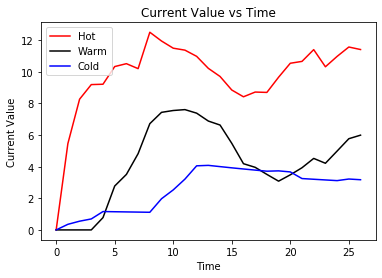

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.746322  0.108677
1  3.0     0.611783  0.344045
2  1.0     0.604255  0.899452
3  2.0     0.589663  0.692755
4  1.0     0.945263  0.202767
5  2.0     0.695116  0.779114
6  3.0     0.898721  0.257204
7  3.0     0.735619  0.827862
8  2.0     0.619657  0.467182
9  5.0     0.888672  0.326006
2 rows expired in 2      Age  Key Terrain   Queries
0    5.0     0.357699  0.602211
1    9.0     0.117661 

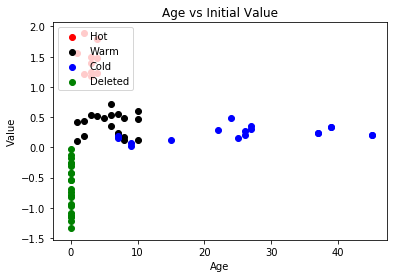

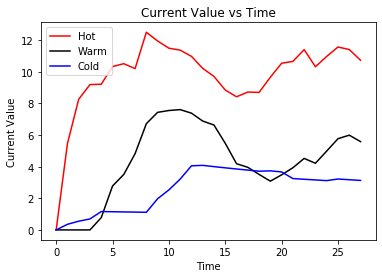

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068]]
0 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.746322  0.108677
1  4.0     0.611783  0.344045
2  2.0     0.604255  0.899452
3  3.0     0.589663  0.692755
4  2.0     0.945263  0.202767
5  3.0     0.695116  0.779114
6  4.0     0.898721  0.257204
7  4.0     0.735619  0.827862
8  3.0     0.619657  0.467182
9  1.0     0.781872  0.947421
3 rows expired in 2      Age  Key Terrain   Queries


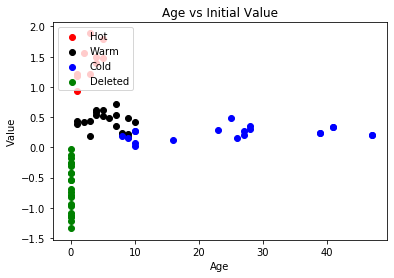

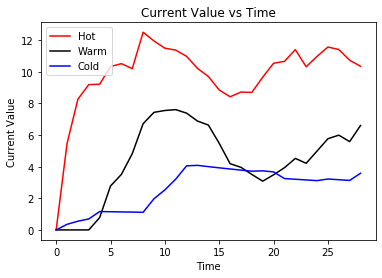

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068]]
2 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.746322  0.108677
1  1.0     0.594315  0.310776
2  3.0     0.604255  0.899452
3  1.0     0.605673  0.204939
4  3.0     0.945263  0.202767
5  4.0     0.695116  0.779114
6  5.0     0.898721  0.257204
7  5.0     0.735619  0.827862
8  1.0     0.467481  0.904016
9  2.0     0.781872  0.947421
1 rows expired in 2      Age  Key Terrain   Queries


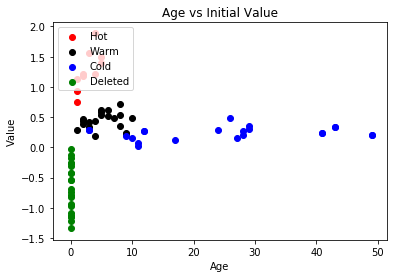

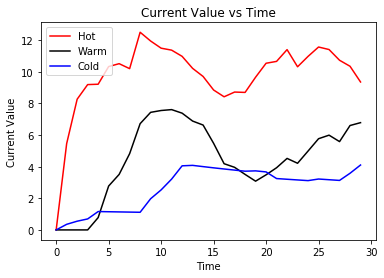

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068]]
2 rows expired in 1    Age  Key Terrain   Queries
0  5.0     0.746322  0.108677
1  2.0     0.594315  0.310776
2  4.0     0.604255  0.899452
3  2.0     0.605673  0.204939
4  4.0     0.945263  0.202767
5  5.0     0.695116  0.779114
6  1.0     0.568569  0.091918
7  1.0     0.464846  0.209192
8  1.0     0.375311  0.152488
9  3.0     0.781872  0.947421
1 rows expired in 2      Age  Key Terrain   Queries


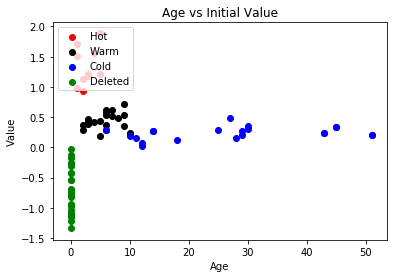

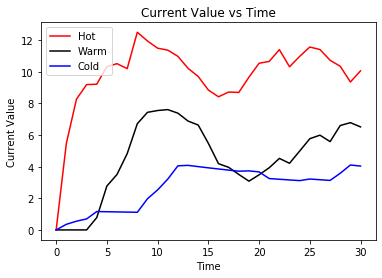

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532]]
2 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.856553  0.696587
1  3.0     0.594315  0.310776
2  5.0     0.604255  0.899452
3  3.0     0.605673  0.204939
4  5.0     0.945263  0.202767
5  1.0     0.754973  0.201065
6  2.0     0.568569  0.091918
7  2.0     0.464846  0.209192
8  1.0     0.488093  0.127802
9  4.0     0.781872  0.94742

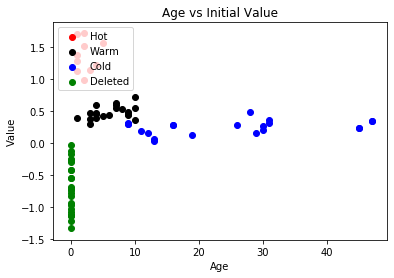

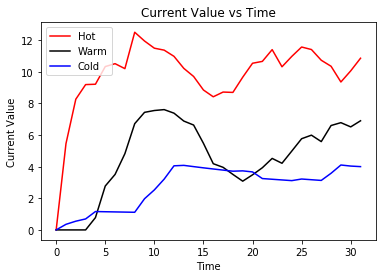

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.856553  0.696587
1  1.0     0.686846  0.454683
2  1.0     0.557949  0.316474
3  4.0     0.605673  0.204939
4  1.0     0.846348  0.457191
5  2.0     0.754973  0.201065
6  3.0     0.568569  0.091918
7  1.0     0.636437  0.462170
8  2.0     0.488093  0.127802
9  5.0     0.781872  0.94742

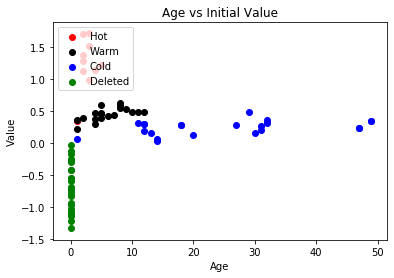

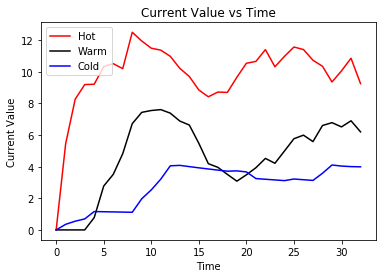

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518]]
1 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.856553  0.696587
1  2.0     0.686846  0.454683
2  2.0     0.557949  0.316474
3  5.0     0.605673  0.204939
4  2.0     0.846348  0.457191
5  3.0     0.754973  0.201065
6  4.0     0.568569  0.091918
7  2.0     0.636437  0.462170
8  3.0     0.488093  0.127802
9 

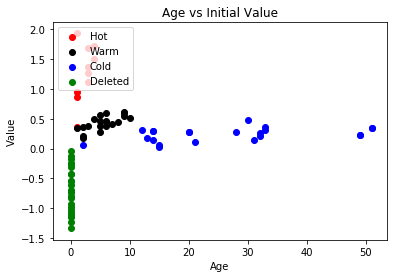

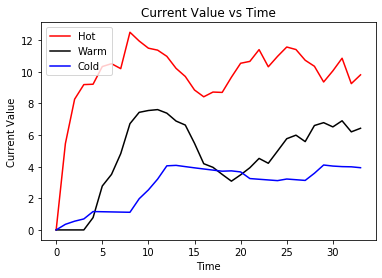

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518]]
0 rows expired in 1    Age  Key Terrain   Queries
0  4.0     0.856553  0.696587
1  3.0     0.686846  0.454683
2  3.0     0.557949  0.316474
3  1.0     0.478353  0.238635
4  3.0     0.846348  0.457191
5  4.0     0.754973  0.201065
6  1.0     0.180649  0.725054
7  3.0     0.636437  0.462170
8  1.0     0.969040  0.385239
9 

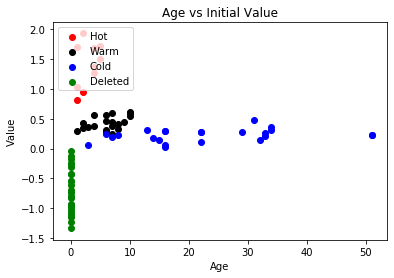

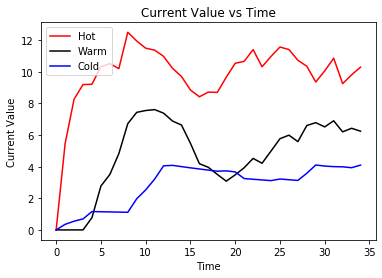

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789]]
2 rows expired in 1    Age  Key Terrain   Queries
0  5.0     0.856553  0.696587
1  4.0     0.686846  0.454683
2  1.0     0.405079  0.272241
3  2.0     0.478353  0.238635
4  4.0     0.846348  0.457191
5  5.0     0.754973  0.201065
6  1.0     0.518368  0.202354
7  4.0     0.636437  0.462170
8  2.

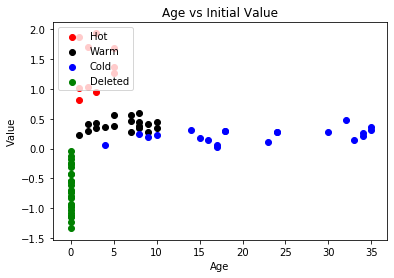

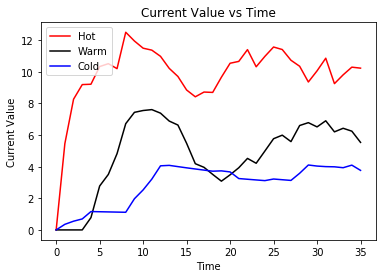

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789], [0.0, 0.5639134980078796]]
3 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.410970  0.310783
1  5.0     0.686846  0.454683
2  1.0     0.936585  0.744754
3  3.0     0.478353  0.238635
4  5.0     0.846348  0.457191
5  1.0     0.505606  0.122876
6  2.0     0.518368  0.202354
7  5.0  

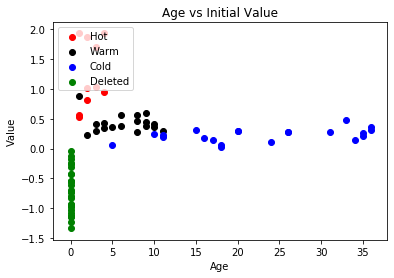

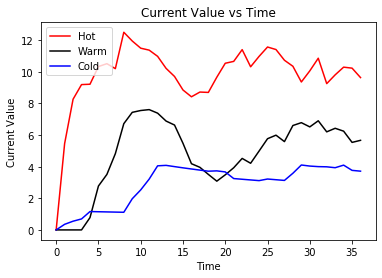

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789], [0.0, 0.5639134980078796], [0.0, 0.9428138471439624]]
0 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.410970  0.310783
1  1.0     0.267829  0.717435
2  2.0     0.936585  0.744754
3  4.0     0.478353  0.238635
4  1.0     0.281929  0.072941
5  2.0     0.505606  0.122876
6  3.0     

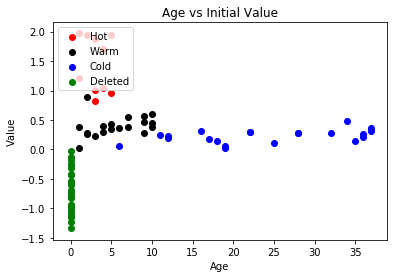

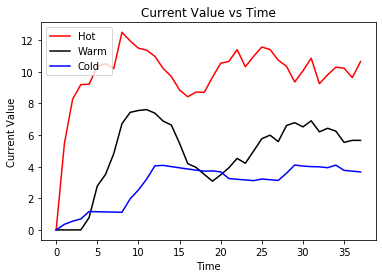

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789], [0.0, 0.5639134980078796], [0.0, 0.9428138471439624], [0.0, 1.1478981480283035]]
2 rows expired in 1    Age  Key Terrain   Queries
0  3.0     0.410970  0.310783
1  1.0     0.987755  0.040330
2  3.0     0.936585  0.744754
3  5.0     0.478353  0.238635
4  1.0     0.603614  0.300499
5  3.0     0.5

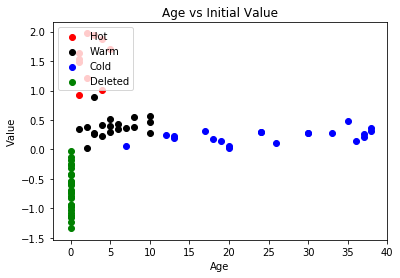

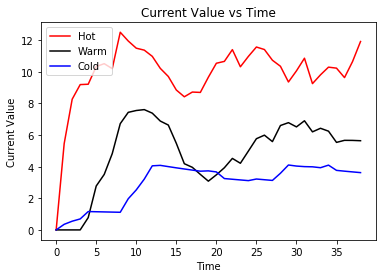

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789], [0.0, 0.5639134980078796], [0.0, 0.9428138471439624], [0.0, 1.1478981480283035]]
1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.763993  0.886611
1  2.0     0.987755  0.040330
2  4.0     0.936585  0.744754
3  1.0     0.744256  0.833002
4  2.0     0.603614  0.300499
5  4.0     0.5

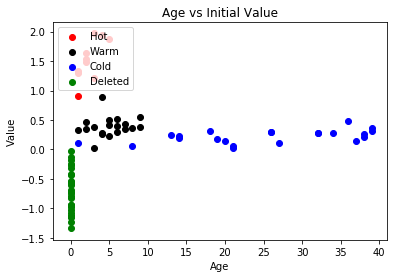

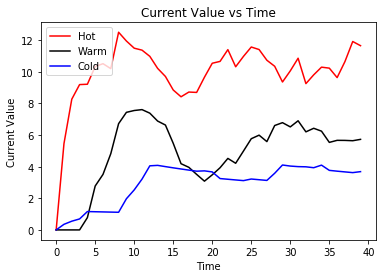

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789], [0.0, 0.5639134980078796], [0.0, 0.9428138471439624], [0.0, 1.1478981480283035]]
1 rows expired in 1    Age  Key Terrain   Queries
0  2.0     0.763993  0.886611
1  3.0     0.987755  0.040330
2  5.0     0.936585  0.744754
3  2.0     0.744256  0.833002
4  3.0     0.603614  0.300499
5  1.0     0.6

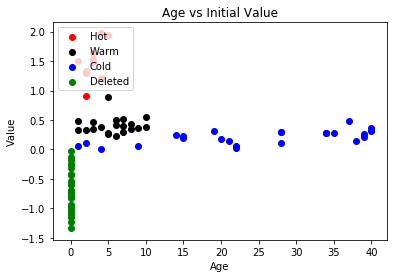

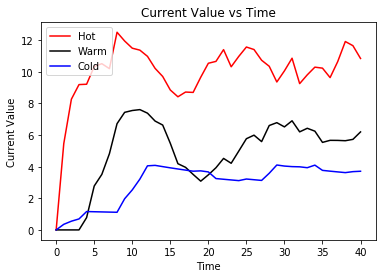

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.2656627710906566], [0.0, 0.18320739357689497], [0.0, 1.3354169027997158], [0.0, 0.03450876172058981], [0.0, 1.2248105636166404], [0.0, 0.8253486914116742], [0.0, 0.4276768195418308], [0.0, 0.5459357806537977], [0.0, 0.9742640367917651], [0.0, 0.13246376869939325], [0.0, 1.1483880393502686], [0.0, 0.5434008330717587], [0.0, 0.24973889658002424], [0.0, 0.30750765794130375], [0.0, 0.732858218386064], [0.0, 0.9345949982252095], [0.0, 0.420762916063093], [0.0, 1.0782099280518103], [0.0, 1.1296623943164068], [0.0, 0.7278811181428522], [0.0, 1.0270434879100532], [0.0, 0.604931952959518], [0.0, 0.9440085459086789], [0.0, 0.5639134980078796], [0.0, 0.9428138471439624], [0.0, 1.1478981480283035], [0.0, 0.15473821143329536]]


In [13]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(40):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = vals.drop(['Age'],axis=1).sum(axis=1).values
    rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
    ind = np.zeros(5).astype(int)
    loop += 5
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(np.nan_to_num(env.ds[env.names[i+1]].dataBatch.get('val_tot'))))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)

## Static Policy

0 rows expired in 3     Age Key Terrain Queries
0   NaN         NaN     NaN
1   NaN         NaN     NaN
2   NaN         NaN     NaN
3   NaN         NaN     NaN
4   NaN         NaN     NaN
5   NaN         NaN     NaN
6   NaN         NaN     NaN
7   NaN         NaN     NaN
8   NaN         NaN     NaN
9   NaN         NaN     NaN
10  NaN         NaN     NaN
11  NaN         NaN     NaN
12  NaN         NaN     NaN
13  NaN         NaN     NaN
14  NaN         NaN     NaN
15  NaN         NaN     NaN
16  NaN         NaN     NaN
17  NaN         NaN     NaN
18  NaN         NaN     NaN
19  NaN         NaN     NaN
20  NaN         NaN     NaN
21  NaN         NaN     NaN
22  NaN         NaN     NaN
23  NaN         NaN     NaN
24  NaN         NaN     NaN
25  NaN         NaN     NaN
26  NaN         NaN     NaN
27  NaN         NaN     NaN
28  NaN         NaN     NaN
29  NaN         NaN     NaN
30  NaN         NaN     NaN
31  NaN         NaN     NaN
32  NaN         NaN     NaN
33  NaN         NaN     NaN


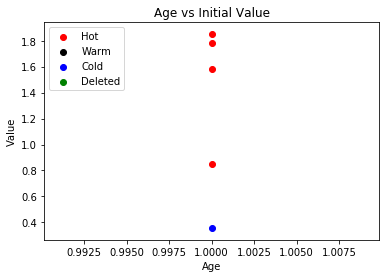

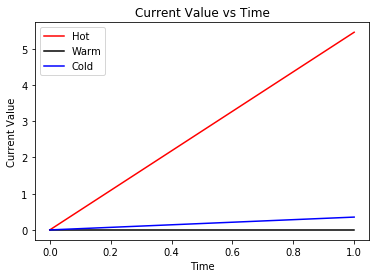

[]
0 rows expired in 3     Age  Key Terrain   Queries
0   1.0     0.715189  0.602763
1   NaN          NaN       NaN
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN       NaN
29  NaN          NaN       NaN
30  NaN         

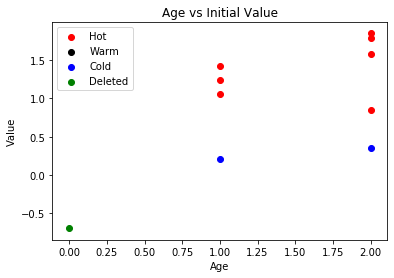

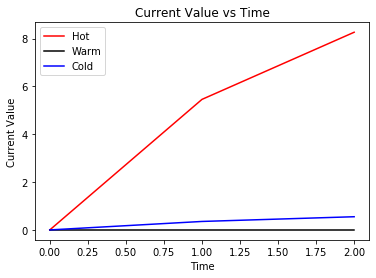

[[0.0, 0.6928434773474355]]
0 rows expired in 3     Age  Key Terrain   Queries
0   2.0     0.715189  0.602763
1   1.0     0.405942  0.024313
2   NaN          NaN       NaN
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN       NaN
29  NaN          NaN  

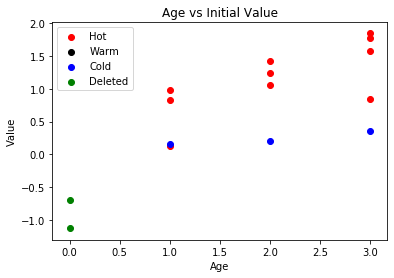

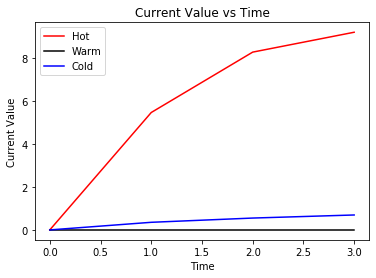

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018]]
0 rows expired in 3     Age  Key Terrain   Queries
0   3.0     0.715189  0.602763
1   2.0     0.405942  0.024313
2   1.0     0.300189  0.266788
3   NaN          NaN       NaN
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN
28  NaN          NaN      

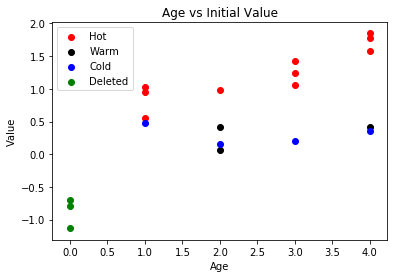

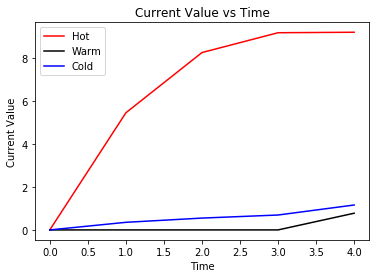

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 3     Age  Key Terrain   Queries
0   4.0     0.715189  0.602763
1   3.0     0.405942  0.024313
2   2.0     0.300189  0.266788
3   1.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN

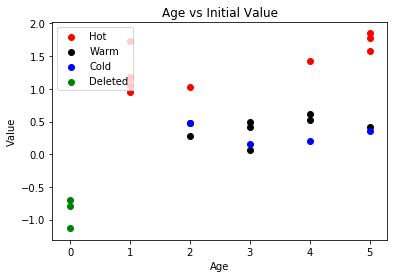

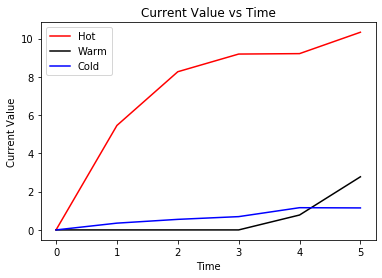

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 3     Age  Key Terrain   Queries
0   5.0     0.715189  0.602763
1   4.0     0.405942  0.024313
2   3.0     0.300189  0.266788
3   2.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN

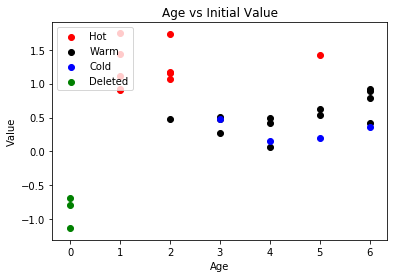

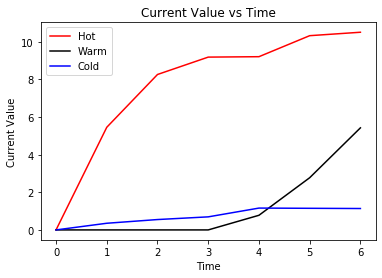

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685]]
0 rows expired in 3     Age  Key Terrain   Queries
0   6.0     0.715189  0.602763
1   5.0     0.405942  0.024313
2   4.0     0.300189  0.266788
3   3.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN          NaN       NaN
27  NaN          NaN       NaN

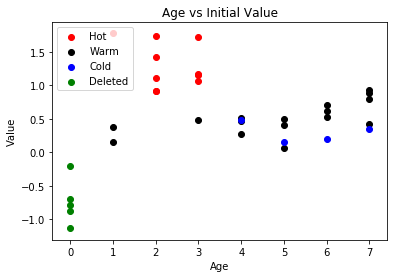

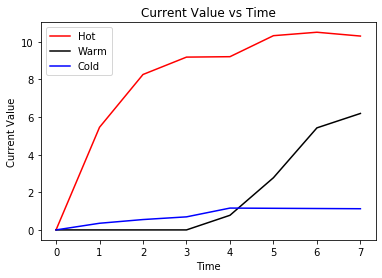

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826]]
0 rows expired in 3     Age  Key Terrain   Queries
0   7.0     0.715189  0.602763
1   6.0     0.405942  0.024313
2   5.0     0.300189  0.266788
3   4.0     0.956942  0.666005
4   NaN          NaN       NaN
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN 

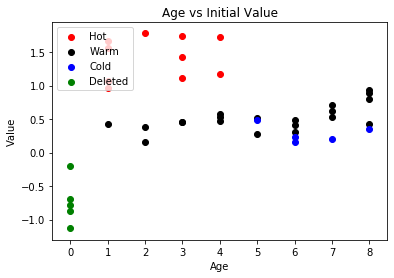

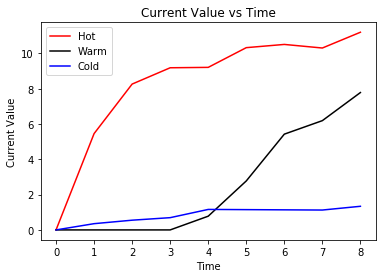

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826]]
0 rows expired in 3     Age  Key Terrain   Queries
0   8.0     0.715189  0.602763
1   7.0     0.405942  0.024313
2   6.0     0.300189  0.266788
3   5.0     0.956942  0.666005
4   6.0     0.474885  0.435883
5   NaN          NaN       NaN
6   NaN          NaN       NaN
7   NaN          NaN       NaN
8   NaN          NaN       NaN
9   NaN          NaN       NaN
10  NaN          NaN       NaN
11  NaN          NaN       NaN
12  NaN          NaN       NaN
13  NaN          NaN       NaN
14  NaN          NaN       NaN
15  NaN          NaN       NaN
16  NaN          NaN       NaN
17  NaN          NaN       NaN
18  NaN          NaN       NaN
19  NaN          NaN       NaN
20  NaN          NaN       NaN
21  NaN          NaN       NaN
22  NaN          NaN       NaN
23  NaN          NaN       NaN
24  NaN          NaN       NaN
25  NaN          NaN       NaN
26  NaN 

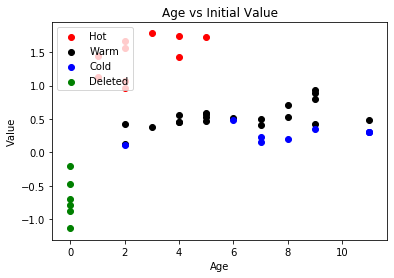

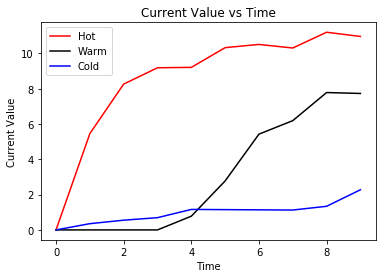

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545]]
0 rows expired in 3      Age  Key Terrain   Queries
0    9.0     0.715189  0.602763
1    8.0     0.405942  0.024313
2    7.0     0.300189  0.266788
3    6.0     0.956942  0.666005
4    7.0     0.474885  0.435883
5   11.0     0.622231  0.279068
6   11.0     0.622231  0.279068
7   11.0     0.622231  0.279068
8    2.0     0.232566  0.858420
9    NaN          NaN       NaN
10   NaN          NaN       NaN
11   NaN          NaN       NaN
12   NaN          NaN       NaN
13   NaN          NaN       NaN
14   NaN          NaN       NaN
15   NaN          NaN       NaN
16   NaN          NaN       NaN
17   NaN          NaN       NaN
18   NaN          NaN       NaN
19   NaN          NaN       NaN
20   NaN          NaN       NaN
21   NaN          NaN       NaN
22   NaN          NaN       NaN
23   NaN          NaN       NaN
24   NaN         

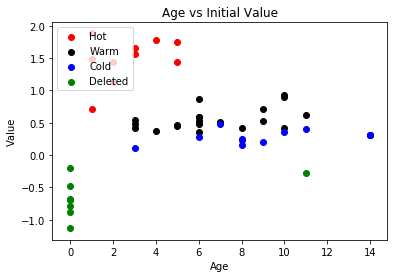

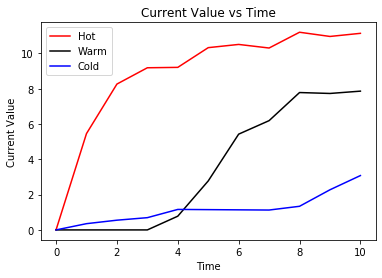

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892]]
0 rows expired in 3      Age  Key Terrain   Queries
0   10.0     0.715189  0.602763
1    9.0     0.405942  0.024313
2    8.0     0.300189  0.266788
3    7.0     0.956942  0.666005
4    8.0     0.474885  0.435883
5   14.0     0.622231  0.279068
6   14.0     0.622231  0.279068
7   14.0     0.622231  0.279068
8    3.0     0.232566  0.858420
9    8.0     0.492632  0.345138
10  11.0     0.791725  0.528895
11   6.0     0.558731  0.330617
12   NaN          NaN       NaN
13   NaN          NaN       NaN
14   NaN          NaN       NaN
15   NaN          NaN       NaN
16   NaN          NaN       NaN
17   NaN          NaN       NaN
18   NaN          NaN       NaN
19   NaN          NaN       NaN
20   NaN          NaN       NaN
21   NaN          NaN       NaN
22   NaN          NaN     

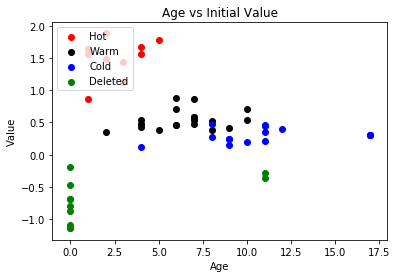

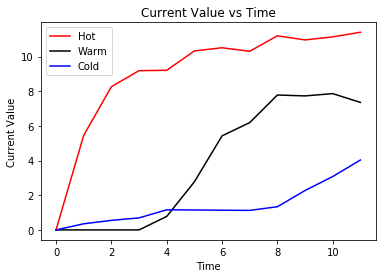

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569]]
0 rows expired in 3      Age  Key Terrain   Queries
0   11.0     0.715189  0.602763
1   10.0     0.405942  0.024313
2    9.0     0.300189  0.266788
3    8.0     0.956942  0.666005
4    9.0     0.474885  0.435883
5   17.0     0.622231  0.279068
6   17.0     0.622231  0.279068
7   17.0     0.622231  0.279068
8    4.0     0.232566  0.858420
9    9.0     0.492632  0.345138
10  12.0     0.791725  0.528895
11   8.0     0.558731  0.330617
12  11.0     0.423655  0.645894
13  11.0     0.891773  0.963663
14  11.0     0.925597  0.071036
15   NaN          NaN       NaN
16   NaN          NaN       NaN
17   NaN          NaN       NaN
18   NaN          NaN       NaN
19   NaN          NaN       NaN
20   NaN 

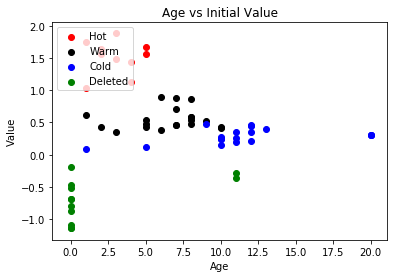

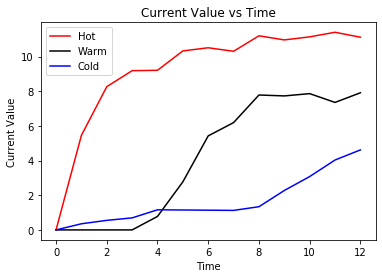

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584]]
0 rows expired in 3      Age  Key Terrain   Queries
0   12.0     0.715189  0.602763
1   11.0     0.405942  0.024313
2   10.0     0.300189  0.266788
3    9.0     0.956942  0.666005
4   10.0     0.474885  0.435883
5   20.0     0.622231  0.279068
6   20.0     0.622231  0.279068
7   20.0     0.622231  0.279068
8    5.0     0.232566  0.858420
9   10.0     0.492632  0.345138
10  13.0     0.791725  0.528895
11  10.0     0.558731  0.330617
12  12.0     0.423655  0.645894
13  12.0     0.891773  0.963663
14  12.0     0.925597  0.071036
15  11.0     0.530537  0.922111
16  11.0     0.710337  0.007884
17   1.0     0.174370  0.900352
18   NaN          NaN       NaN
19   NaN      

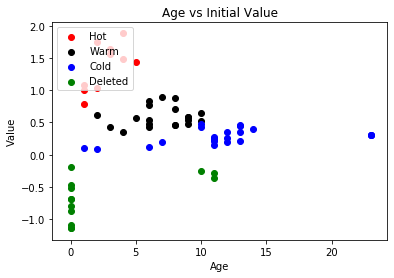

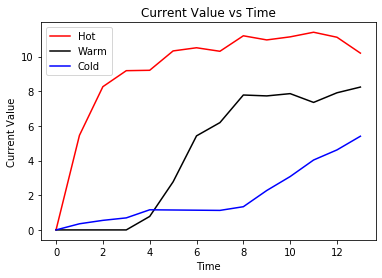

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489]]
0 rows expired in 3      Age  Key Terrain   Queries
0   13.0     0.715189  0.602763
1   12.0     0.405942  0.024313
2   11.0     0.300189  0.266788
3   10.0     0.956942  0.666005
4   11.0     0.474885  0.435883
5   23.0     0.622231  0.279068
6   23.0     0.622231  0.279068
7   23.0     0.622231  0.279068
8    6.0     0.232566  0.858420
9   11.0     0.492632  0.345138
10  14.0     0.791725  0.528895
11  11.0     0.558731  0.330617
12  13.0     0.423655  0.645894
13  13.0     0.891773  0.963663
14  13.0     0.925597  0.071036
15  12.0     0.530537  0.922111
16  12.0     0.710337  0.007884
17   2.0     0.174370  0.900352
18  11.0     0.413

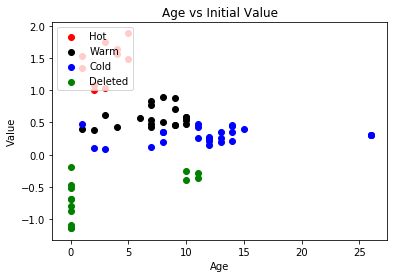

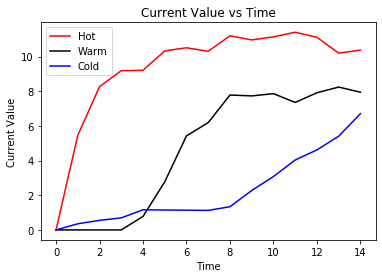

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823]]
0 rows expired in 3      Age  Key Terrain   Queries
0   14.0     0.715189  0.602763
1   13.0     0.405942  0.024313
2   12.0     0.300189  0.266788
3   11.0     0.956942  0.666005
4   12.0     0.474885  0.435883
5   26.0     0.622231  0.279068
6   26.0     0.622231  0.279068
7   26.0     0.622231  0.279068
8    7.0     0.232566  0.858420
9   12.0     0.492632  0.345138
10  15.0     0.791725  0.528895
11  12.0     0.558731  0.330617
12  14.0     0.423655  0.645894
13  14.0     0.891773  0.963663
14  14.0     0.925597  0.071036
15  13.0     0.530537  0.922111
16  13.0     0.710337  0.007884
17   3.0     0.174370

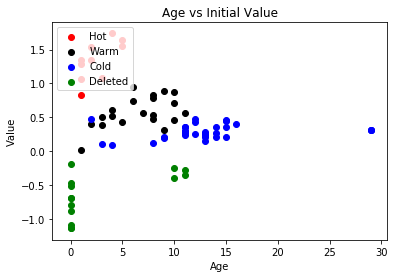

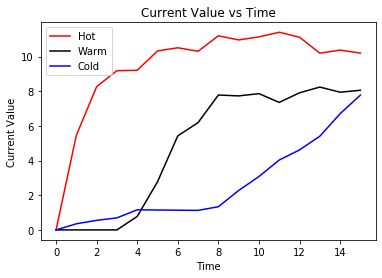

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823]]
0 rows expired in 3      Age  Key Terrain   Queries
0   15.0     0.715189  0.602763
1   14.0     0.405942  0.024313
2   13.0     0.300189  0.266788
3   12.0     0.956942  0.666005
4   13.0     0.474885  0.435883
5   29.0     0.622231  0.279068
6   29.0     0.622231  0.279068
7   29.0     0.622231  0.279068
8    8.0     0.232566  0.858420
9   13.0     0.492632  0.345138
10  16.0     0.791725  0.528895
11  13.0     0.558731  0.330617
12  15.0     0.423655  0.645894
13  15.0     0.891773  0.963663
14  15.0     0.925597  0.071036
15  14.0     0.530537  0.922111
16  14.0     0.710337  0.007884
17   4.0     0.174370

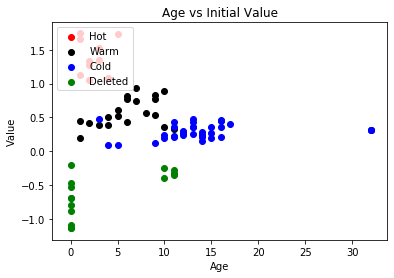

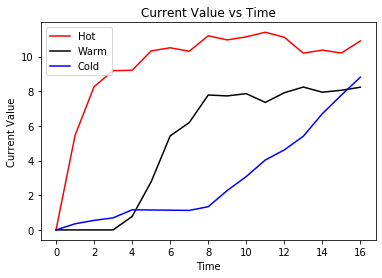

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986]]
0 rows expired in 3      Age  Key Terrain   Queries
0   16.0     0.715189  0.602763
1   15.0     0.405942  0.024313
2   14.0     0.300189  0.266788
3   13.0     0.956942  0.666005
4   14.0     0.474885  0.435883
5   32.0     0.622231  0.279068
6   32.0     0.622231  0.279068
7   32.0     0.622231  0.279068
8    9.0     0.232566  0.858420
9   14.0     0.492632  0.345138
10  17.0     0.791725  0.528895
11  14.0     0.558731  0.330617
12  16.0     0.423655  0.645894
13  16.0     0.891773  0.963663
14  16.0     0.925597  0.071036
15  15.0     0.530537  0.922111
16  15.0     0.710337  0.

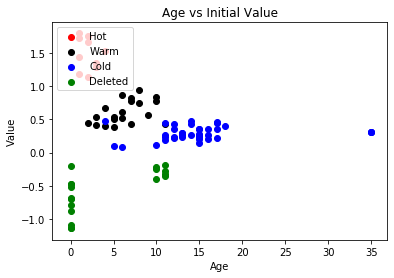

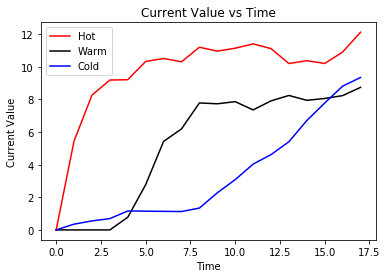

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308]]
0 rows expired in 3      Age  Key Terrain   Queries
0   17.0     0.715189  0.602763
1   16.0     0.405942  0.024313
2   15.0     0.300189  0.266788
3   14.0     0.956942  0.666005
4   15.0     0.474885  0.435883
5   35.0     0.622231  0.279068
6   35.0     0.622231  0.279068
7   35.0     0.622231  0.279068
8   10.0     0.232566  0.858420
9   15.0     0.492632  0.345138
10  18.0     0.791725  0.528895
11  15.0     0.558731  0.330617
12  17.0     0.423655  0.645894
13  17.0     0.891773  0.963663
14  1

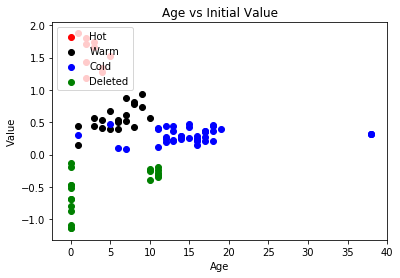

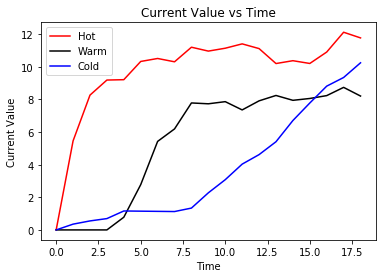

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309]]
0 rows expired in 3      Age  Key Terrain   Queries
0   18.0     0.715189  0.602763
1   17.0     0.405942  0.024313
2   16.0     0.300189  0.266788
3   15.0     0.956942  0.666005
4   16.0     0.474885  0.435883
5   38.0     0.622231  0.279068
6   38.0     0.622231  0.279068
7   38.0     0.622231  0.279068
8   11.0     0.232566  0.858420
9   16.0     0.492632  0.345138
10  19.0     0.791725  0.528895
11  16.0     0.558731  0.330617
12  18.0    

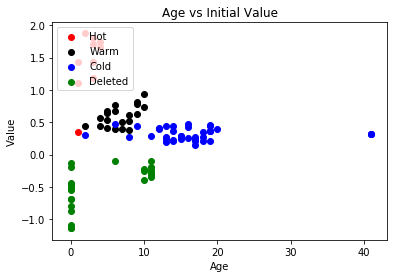

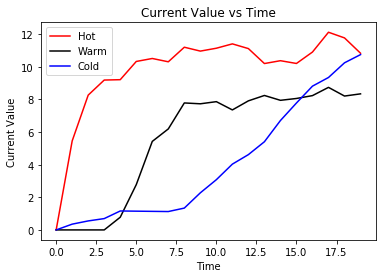

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513]]
0 rows expired in 3      Age  Key Terrain   Queries
0   19.0     0.715189  0.602763
1   18.0     0.405942  0.024313
2   17.0     0.300189  0.266788
3   16.0     0.956942  0.666005
4   17.0     0.474885  0.435883
5   41.0     0.622231  0.279068
6   41.0     0.622231  0.279068
7   41.0     0.622231  0.279068
8    8.0     0.538708  0.4306

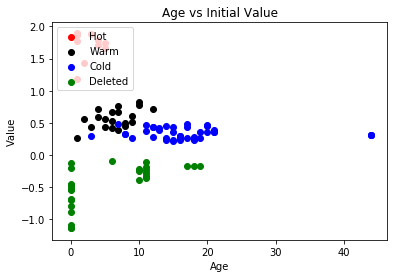

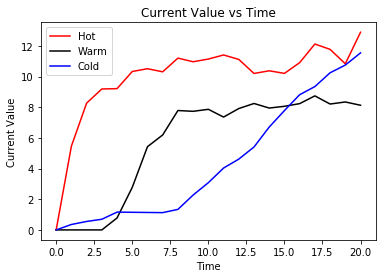

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225]]
0 rows expired in 3      Age  Key Terrain   Queries
0   20.0     0.715189  0.602763
1   12.0     0.870671  0.302413
2   11.0     0.942501  0.388171
3   17.0     0.956942  0.666005
4   18.0     0.474885  0.435883
5   44.0     0.622231  0.279068
6   44

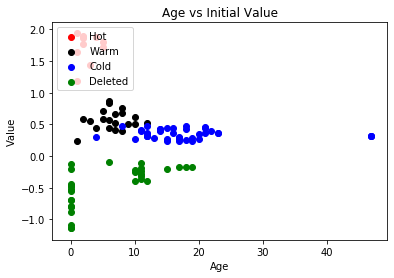

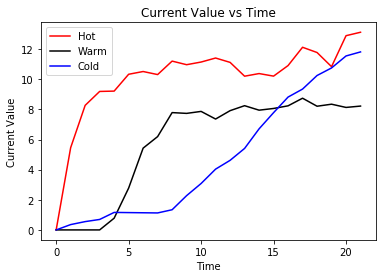

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764]]
0 rows expired in 3      Age  Key Terrain   Queries
0   21.0     0.715189  0.602763
1   14.0     0.870671  0.302413
2   12.0     0.942501  0.388171
3   18.0     0.95

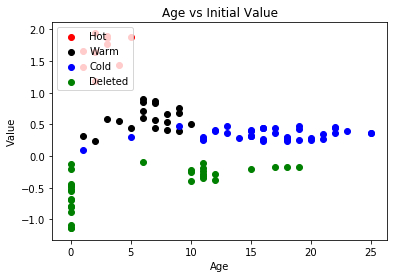

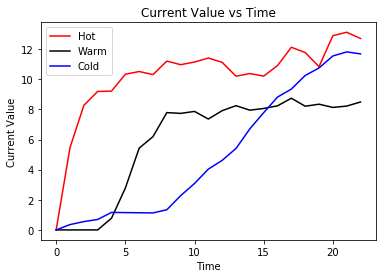

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764]]
0 rows expired in 3      Age  Key Terrain   Queries
0   22.0     0.715189  0.602763
1   16.0     0.870671  0.302413
2   13.0     0.94250

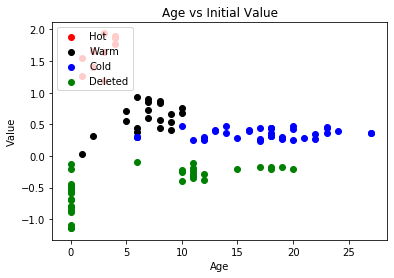

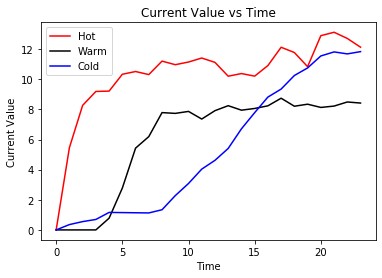

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613]]
0 rows expired in 3     

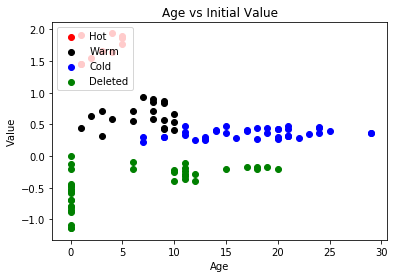

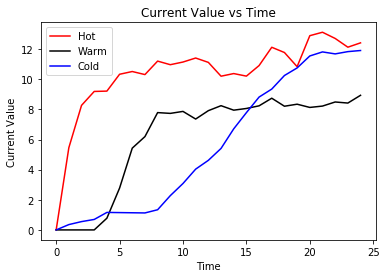

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

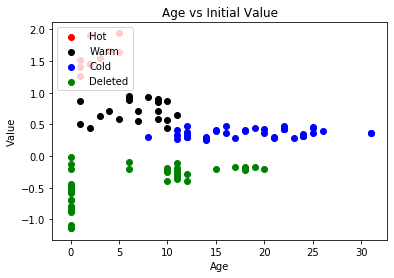

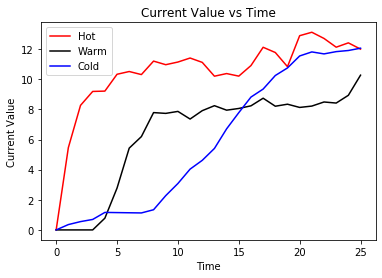

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

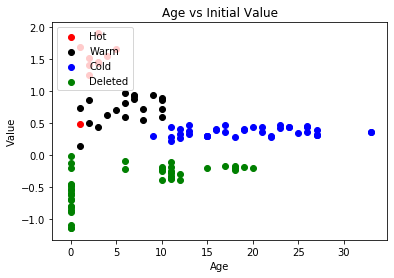

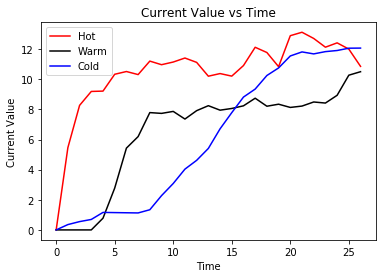

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

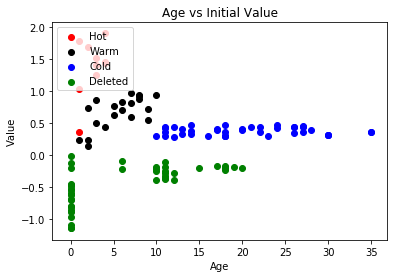

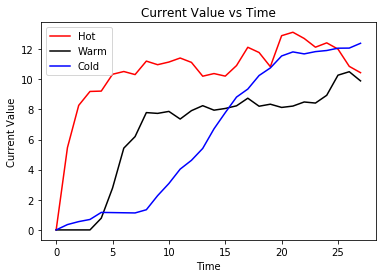

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

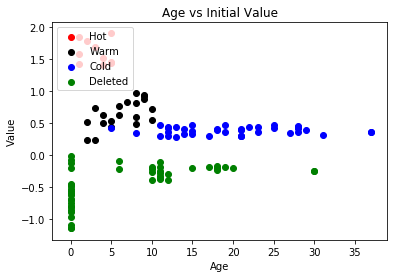

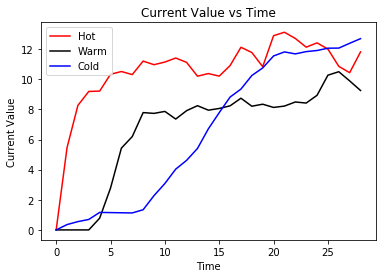

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

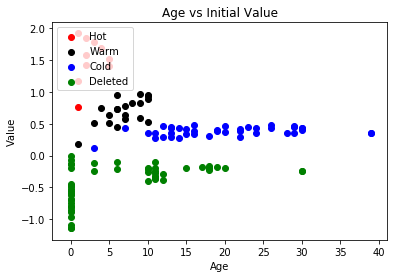

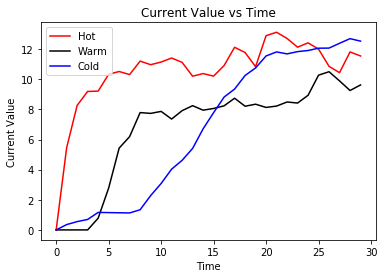

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

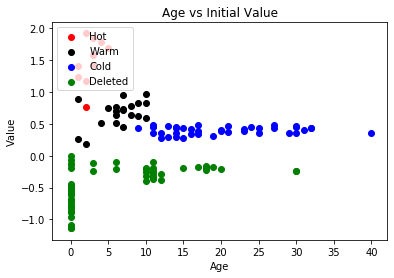

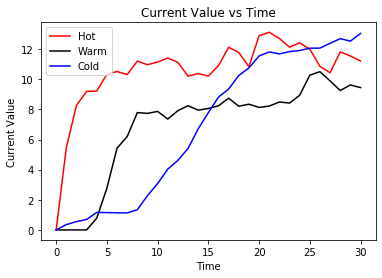

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

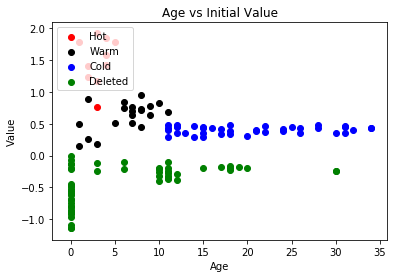

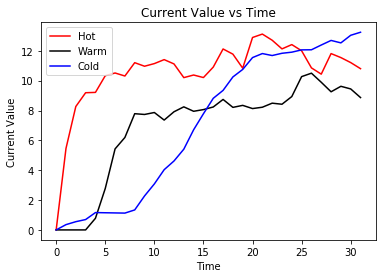

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

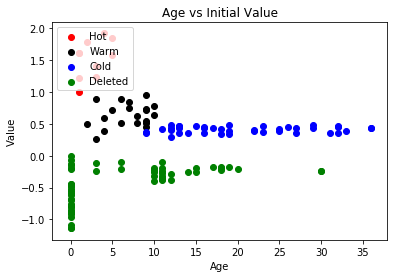

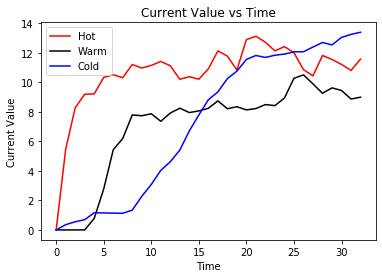

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

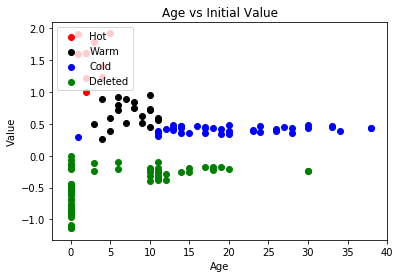

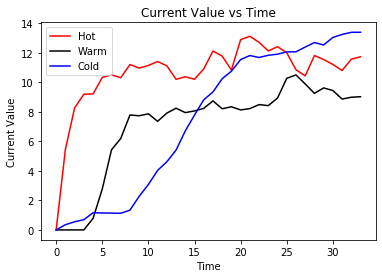

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

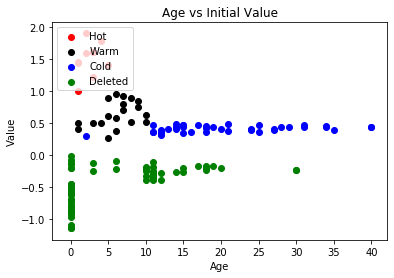

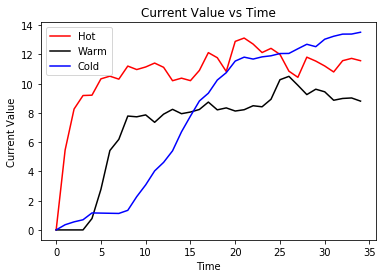

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

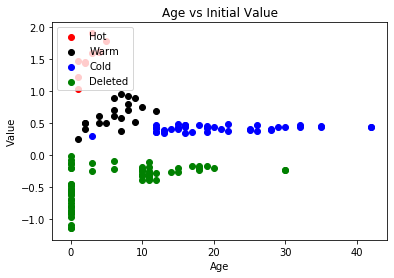

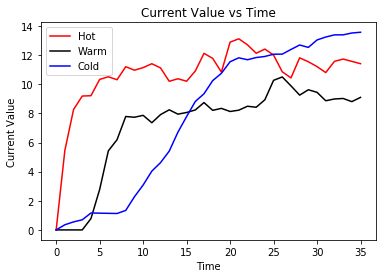

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

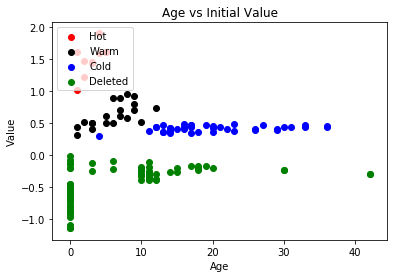

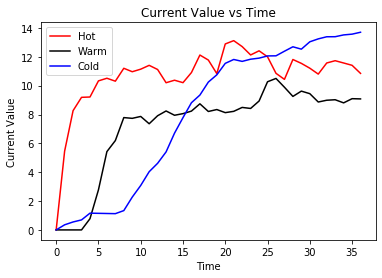

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

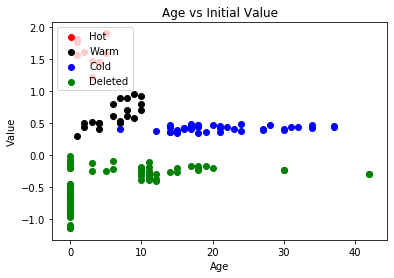

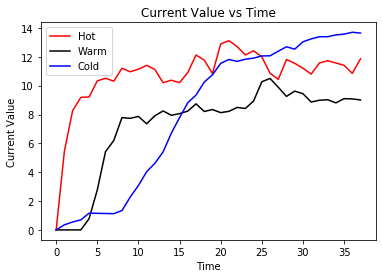

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

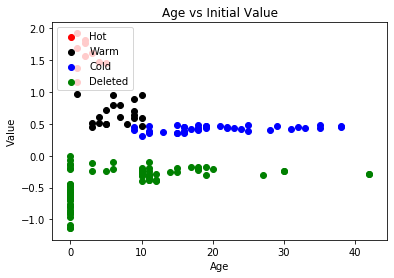

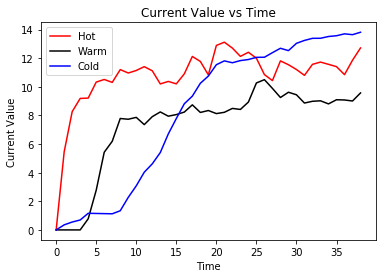

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

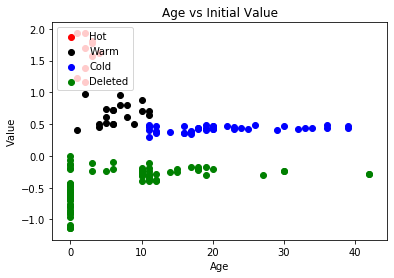

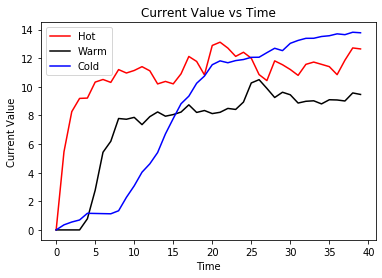

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

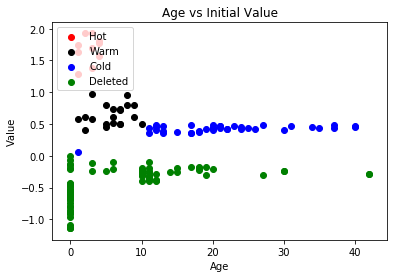

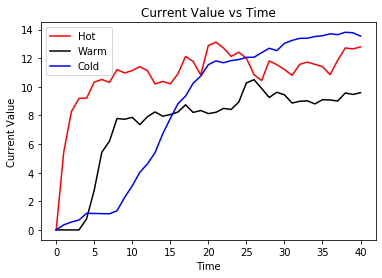

[[0.0, 0.6928434773474355], [0.0, 1.1301128573854018], [0.0, 0.7905002785366685], [0.0, 0.1978542305233063], [0.0, 0.880403990372826], [0.0, 0.47527325788550545], [11.0, 0.2785536349835873], [0.0, 0.6864813277023892], [11.0, 0.3544308567249243], [0.0, 1.089989722854563], [0.0, 1.1387858619205569], [0.0, 0.5221215193588584], [10.0, 0.2526531464186489], [10.0, 0.39145120417784823], [11.0, 0.3215575583927986], [11.0, 0.18937835854662072], [10.0, 0.2166092315376979], [0.0, 0.4700902609631308], [11.0, 0.23990737714923624], [0.0, 0.12557167653129309], [6.0, 0.09268151417841294], [11.0, 0.10411270379850716], [0.0, 0.5488440434134463], [0.0, 0.4458470622192513], [18.0, 0.16938222701876746], [17.0, 0.17438742563652038], [19.0, 0.17500515127558225], [12.0, 0.38587481340492813], [0.0, 0.8029869724051405], [15.0, 0.19828387361793764], [12.0, 0.28435022510255764], [18.0, 0.19917853832977986], [0.0, 0.8582527053862594], [20.0, 0.20146374218664836], [0.0, 0.5837725088343613], [0.0, 0.0062380242547763

In [14]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

for q in np.arange(40):
    # New batch of 5 lines, here represented by 5 random values
    batch = pd.read_csv("dns.log",header = 0)
    vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
    vals['Age'] = 0
    val_tot = vals.drop(['Age'],axis=1).sum(axis=1).values
    rplan = np.hstack((np.mgrid[0:5, 1:4][1].astype(int),np.zeros(5).reshape(-1,1).astype(int)))
    ind = np.zeros(5).astype(int)
    loop += 5
    db = dataBatch(batch,vals,val_tot,ind,rplan)

    toy_agents.batch_load_static(env, db, 100)
    t += 1
    env.render(out=0)
    clr = ['r','k','b']
    sub = plt.subplot()
    sub.set_title('Current Value vs Time')
    sub.set_xlabel('Time')
    sub.set_ylabel('Current Value')
    for i in np.arange(env.num_ds):
        vals_plot[i].append(sum(np.nan_to_num(env.ds[env.names[i+1]].dataBatch.get('val_tot'))))
        sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

    sub.legend(loc=2)
    plt.show()

    #env.render(out=1)
    print(env.del_val)

In [ ]:
[np.nan for x in range(3)]

In [5]:
a = [1,2,3,0]